## Logistic Regression

In [1]:
# Common imports
import numpy as np
import pandas as pd
import os, sys

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-whiteg'
              ''
              'rid')

import warnings
warnings.filterwarnings(action="ignore")

C:\Users\RKW\AppData\Local\Temp\ipykernel_4004\1369855056.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whiteg'


### Logistic function/sigmoid function

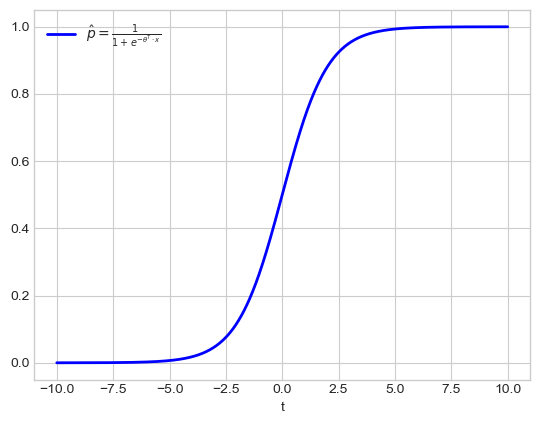

In [2]:
## When b = 0, centralize the graph
t = np.linspace(-10, 10, 1000)
sigmoid = np.exp(t) / (1 + np.exp(t))

fig = plt.figure()
ax = plt.axes()

ax.plot(t, sigmoid, "b-", linewidth=2 ,label= r"$\hat{p} = \frac{1}{1 + e^{- \theta^T\cdot x}}$")
ax.set_xlabel("t")
ax.legend()

#### Loss function of Logistic Regression:

We take log in both sides
$$ln \frac{y}{1-y} = \theta^T \cdot x +b$$

If we view $y$ as $p(y=1|x)$, we can get
$$ln\frac{p(y=1|x)}{p(y=0|x)} = \theta^T \cdot x +b$$


And in the binary classification problem, if we view $y$ as probability of positive case and $1-y$ as the probability of negative case, $\frac{y}{1-y}$ is called "odds", which indicates the relative probability of $x$ as positive case. And $ln \frac{y}{1-y}$ is "log odds", a.k.a "logit"

And obviously $$p(y=1|x) = \frac{e^{\theta^Tx+b}}{1+e^{\theta^Tx+b}}$$

$$p(y=0|x) = \frac{1}{1+e^{\theta^Tx+b}}$$

So if we apply maximum likelihood method to estimate $\theta$ and $b$, for given data samples, likelihood is:
$$L(\theta, b) = \Pi_{i=1}^m p(y_i|x_i;\theta, b)$$
Take log on both sides, we got log-likelihood is:
$$l(\theta, b) = \sum_{i=1}^m ln [p(y_i|x_i;\theta, b)]$$




To make the expression simple, we can consider $x$ with constant 1 so that we can integrate the intercept $b$ : from $\theta^T x + b$ to $\theta^T x$ 

And take into consideration that we are doing binary classification, so $p_1(x,\theta) = p(y=1|x;\theta)$, $p_0(x,\theta) = p(y=0|x;\theta) = 1 - p(y=1|x;\theta)$ we can get a new expression of the likelihood function:

$$p(y_i|x_i; \theta) = y_ip_1(x;\theta) + (1-y_i)p_0(x;\theta)$$

And so that we have a new  negative log-likelihood function as our loss function:

$$l(\theta) = \sum_{i=1}^m(-y_i\theta^Tx_i + ln(1+ e^{\theta^Tx_i}))$$


And this loss function is differentiable w.r.t $\theta$, if we apply first-order optimization techniques, such as **Gradient Descent, SGD**, we can easily get the results.

$$\frac{\partial l(\theta)}{\partial \theta} = - \sum_{i=1}^m x_i(y_i - p_1(x_i;\theta)) = \sum_{i=1}^m (\sigma(\theta^Tx_i) - y_i)x_i$$

And for the $j-th$ dimension, 
$$\frac{\partial l(\theta)}{\partial \theta_j} =  \sum_{i=1}^m (\sigma(\theta^Tx_i) - y_i)x_i^{(j)}$$
Where x already includes $1$ as for the intercept $b$





As case study, we are going to use **Iris dataset** from sklearn, and we are going to look deep into the dataset as we are also going to use it for several other algorithms studies.

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
type(iris)

sklearn.utils._bunch.Bunch

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Target is encoded as numerical numbers, and the detailed information can be seen from the mapping:

In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
len(iris.target)

150

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

For the dataset, it contains such features:

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
len(iris.data)

150

Since we are now talking about binary classification, we will select one feature and distinguish one target from others.

In [11]:
X = iris.data[:, 0].reshape((len(iris.data[:, 0]),-1))  # sepal length (cm)
y = (iris.target == 2).astype(np.int32)  # 1 if Iris-Virginica, else 0

Let's first look at sklearn Losgistic Regression API:

In [12]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42, solver='liblinear')

The intercept $b$ is as:

In [13]:
log_reg.intercept_

array([-3.9921824])

And the $\theta$ to be multiplied to $x$ is: 

In [14]:
log_reg.coef_

array([[0.57972675]])

First let's use the formula to do the calculation ourself.

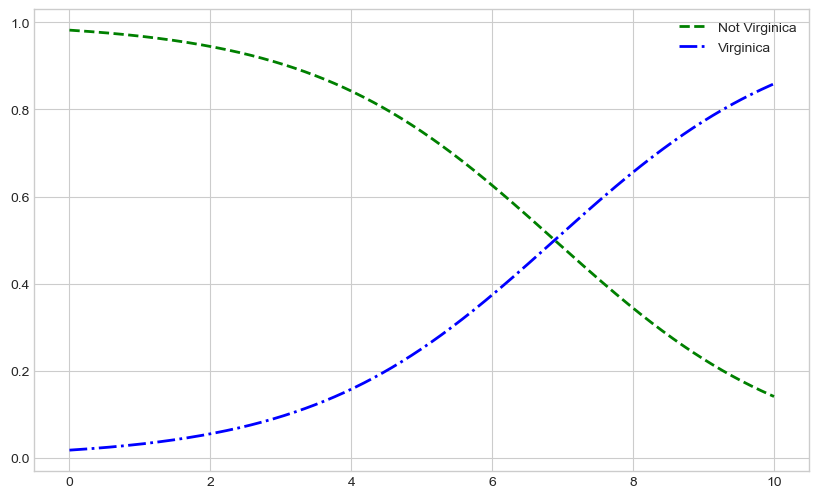

In [15]:
feature_new = np.linspace(0, 10, 1000).reshape(-1, 1)
# y_proba = log_reg.predict_proba(X_new)
## Since log_reg is fitting intercept
target_probability_1 = 1/(1+np.exp(-(log_reg.coef_*feature_new+log_reg.intercept_)))
target_probability_2 = 1/(1+np.exp(log_reg.coef_*feature_new+log_reg.intercept_)) 
target_probability = np.c_[target_probability_1, target_probability_2]

fig = plt.figure(figsize=(10,6))
ax= plt.axes()

ax.plot(feature_new, target_probability[:, 1], "g--",  linewidth=2, label="Not Virginica")
ax.plot(feature_new, target_probability[:, 0], "b-.", linewidth=2, label="Virginica")
ax.legend()

In [19]:
decision_boundary = np.min(feature_new[target_probability[:, 1] >= 0.5])
decision_boundary

6.886886886886887

For Logistic Regression, we can see the boundary is linear w.r.t to the distribution of the datasets. Which is still true even when we generalize our model to higher dimensions.

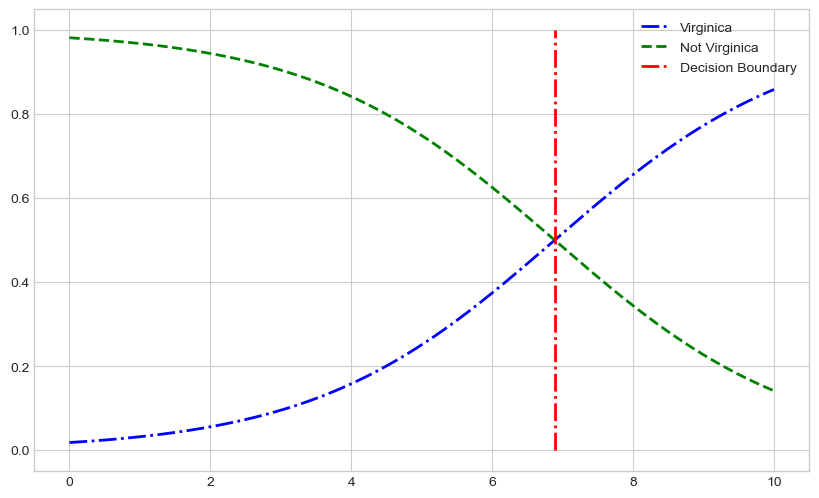

In [20]:
feature_new = np.linspace(0, 10, 1000).reshape(-1, 1)
target_probability = log_reg.predict_proba(feature_new)

fig = plt.figure(figsize=(10,6))
ax= plt.axes()

ax.plot(feature_new, target_probability[:, 1], "b-.",  linewidth=2, label="Virginica")
ax.plot(feature_new, target_probability[:, 0], "g--", linewidth=2, label="Not Virginica")
ax.plot([decision_boundary, decision_boundary], [0, 1], "r-.", linewidth=2, label= 'Decision Boundary')
ax.legend()

In [21]:
log_reg.predict_proba([[6], [8]])

array([[0.62570199, 0.37429801],
       [0.34397462, 0.65602538]])

In [22]:
0.62570199+0.37429801

1.0

In [23]:
0.34397462+0.65602538

1.0

In [24]:
## Based on the decision boundary
log_reg.predict([[6], [8]])

array([0, 1])

### Take home exercise:

Can we reproduce the algorithm with gradient descent?